# Lecture 5 - SciPy

Scipy is a collection of packages that provide useful mathematical functions commonly used for scientific computing.

List of subpackages
- cluster : Clustering algorithms
- constants : Physical and mathematical constants
- fftpack : Fast Fourier Transform routines
- integrate : Integration and ordinary differential equation solvers
- interpolate : Interpolation and smoothing splines
- io : Input and Output
- linalg : Linear algebra
- ndimage : N-dimensional image processing
- odr : Orthogonal distance regression
- optimize : Optimization and root-finding routines
- signal : Signal processing
- sparse : Sparse matrices and associated routines
- spatial : Spatial data structures and algorithms
- special : Special functions
- stats : Statistical distributions and functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Interpolation : `scipy.interpolate`

In [2]:
import scipy.interpolate as interp

In [3]:
x = np.linspace(-1,2,5)
x

array([-1.  , -0.25,  0.5 ,  1.25,  2.  ])

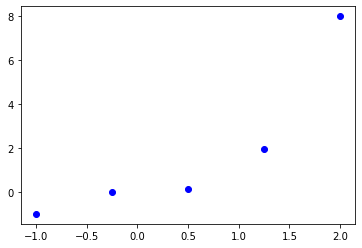

In [4]:
y = x**3
plt.plot(x,y,'bo')

In [5]:
f = interp.interp1d(x,y,kind="linear")

In [6]:
type(f)

scipy.interpolate.interpolate.interp1d

In [7]:
f(0.2)

array(0.06875)

In [8]:
f(1.8)

array(6.3875)

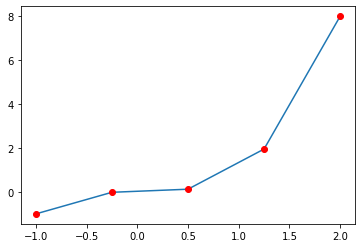

In [9]:
x_fine = np.linspace(-1,2,100)
plt.plot(x_fine,f(x_fine))
plt.plot(x,y,'ro')

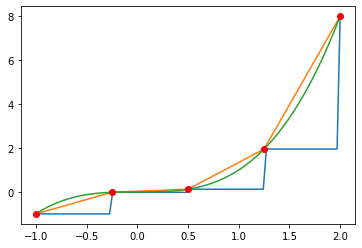

In [10]:
plt.plot(x_fine, interp.interp1d(x,y,kind="zero")(x_fine))
plt.plot(x_fine, interp.interp1d(x,y,kind="linear")(x_fine))
plt.plot(x_fine, interp.interp1d(x,y,kind="cubic")(x_fine))
plt.plot(x,y,'ro')

In [11]:
interp.interp1d?

In [12]:
interp.interp2d?

## Optimization : `scipy.optimize`

Contains functions to find minima, roots and fit parameters 

In [13]:
from scipy import optimize

In [14]:
def f(x):
    return x**4 - 10*x**2

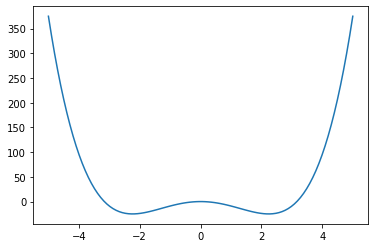

In [15]:
x = np.linspace(-5,5,100)
plt.plot(x,f(x));

In [16]:
results = optimize.minimize(f, 4)
results

      fun: -24.99999999999999
 hess_inv: array([[0.02496788]])
      jac: array([1.43051147e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([2.236068])

In [17]:
optimize.minimize?

In [18]:
x_opt = results.x

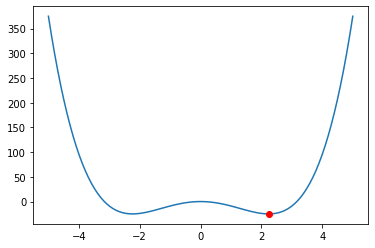

In [19]:
plt.plot(x,f(x));
plt.plot(x_opt,f(x_opt),'ro');

In [20]:
results = optimize.minimize(f, -3)
results

      fun: -24.99999999999999
 hess_inv: array([[0.02502251]])
      jac: array([-4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([-2.236068])

In [21]:
x_opt = results.x

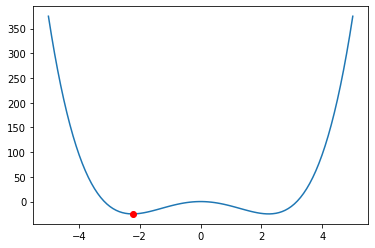

In [22]:
plt.plot(x,f(x));
plt.plot(x_opt,f(x_opt),'ro');

In [23]:
def f(x):
    return x[0]*x[0] + x[1]*x[1] + 5*(np.sin(2*x[0]) + np.sin(2*x[1]))

In [24]:
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
X,Y = np.meshgrid(x,y)

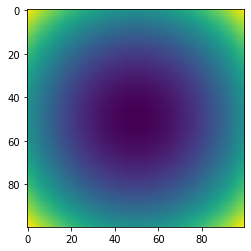

In [25]:
plt.imshow(X**2 + Y**2)

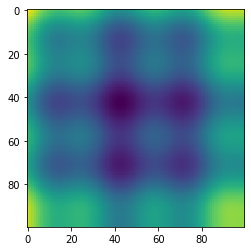

In [26]:
plt.imshow(f(np.array([X,Y])))

In [27]:
optimize.minimize(f, x0=[-1,1])

      fun: -4.399749751160589
 hess_inv: array([[4.59626790e-02, 1.55398036e-05],
       [1.55398036e-05, 4.98006505e-02]])
      jac: array([1.19209290e-07, 5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 56
      nit: 9
     njev: 14
   status: 0
  success: True
        x: array([-0.71377589,  2.13554767])

In [28]:
optimize.minimize(f,x0=[-4,-2])

      fun: 4.516369840169455
 hess_inv: array([[0.06189492, 0.00018857],
       [0.00018857, 0.04545633]])
      jac: array([-4.76837158e-07,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([-3.53444566, -0.71377587])

## Curve Fitting

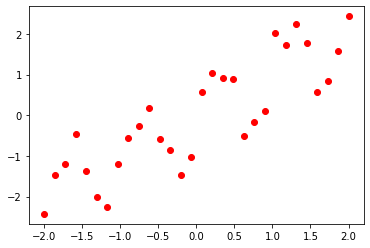

In [29]:
x = np.linspace(-2,2,30)
y = x+np.sin(6.5*x)+0.3*np.random.randn(30)
plt.plot(x,y,'ro')

In [30]:
def f(x,a,b):
    return a*x + b

In [31]:
((a,b),_) = optimize.curve_fit(f,x,y,(0,0))
a,b

(0.956883683877716, -0.03171916890003037)

In [32]:
optimize.curve_fit?

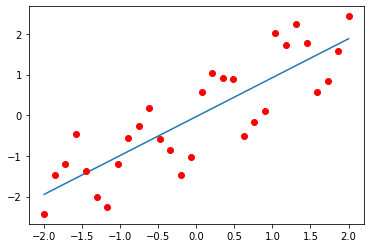

In [33]:
x_fine = np.linspace(-2,2,200)
plt.plot(x_fine,f(x_fine,a,b))
plt.plot(x,y,'ro')

In [34]:
def g(x,a,b,c):
    return a*x + b*np.sin(c*x)

In [35]:
y

array([-2.42714015, -1.46615649, -1.20039416, -0.46798478, -1.38284746,
       -2.01800942, -2.24962653, -1.20685429, -0.56093677, -0.26666905,
        0.18122841, -0.58516662, -0.84694274, -1.461363  , -1.02592368,
        0.57357858,  1.0337241 ,  0.91869551,  0.90353339, -0.52103743,
       -0.17318806,  0.09526914,  2.02082893,  1.71854475,  2.25287091,
        1.78730052,  0.56595894,  0.83799659,  1.58362088,  2.4355149 ])

In [36]:
((a,b,c),_) = optimize.curve_fit(g,x,y,(0,0,6))
a,b,c

(1.0135620478577507, 0.9758277862636953, 6.534507537419043)

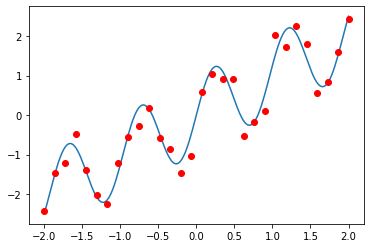

In [37]:
x_fine = np.linspace(-2,2,200)
plt.plot(x_fine,g(x_fine,a,b,c))
plt.plot(x,y,'ro')

## Root Finding

In [38]:
def f(x):
    return np.sin(x)

In [39]:
optimize.root(f,-1)

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-5.73971851e-42])
       r: array([-1.])
  status: 1
 success: True
       x: array([0.])

In [40]:
res = optimize.root(f,-6)

In [41]:
res.x

array([-6.28318531])

## Linear programming
A very common case is linear programming (LP). These are optimization problems that can be written in the form

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & c^{T}x  \\
\text{subject to} \;\; & A_{ub}x \leq b_{ub} \\
& A_{eq}x = b_{eq}
\end{split}
\end{equation}
$$

Here, we are finding the vector $x$ that minimizes the dot product $c^T x$, where $c$ is some fixed vector, out of all $x$ that satisfy $A_{ub}x \leq b_{ub}$ and $A_{eq}x = b_{eq}$, where $A_{ub}$ and $A_{eq}$ are matrices and $b_{ub}$ and $b_{eq}$ are vectors.

## Exercise
Using Google and reading documentation are important parts of programming. `scipy.optimize` comes with specialized functions for solving linear programming problems.

Figure out how to solve LPs using `scipy.optimize`, and solve the following LP:
$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & x_1 + 2 x_2  \\
\text{subject to} \;\; & x_1 \leq 1 \\
& 5 x_1 + x_2 \geq 0
\end{split}
\end{equation}
$$

Note that the problem is equivalent to

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & c^T x  \\
\text{subject to} \;\; & A_{ub}x \leq b_{ub} \\
& A_{eq}x = b_{eq}
\end{split}
\end{equation}
$$
where
$$
c = \begin{pmatrix} 1 \\ 2 \end{pmatrix} \qquad 
A_{ub} = \begin{pmatrix} 1 & 0 \\ -5 & -1 \end{pmatrix}, \qquad
b_{ub} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \qquad
A_{eq} = 0, \qquad
b_{eq} = 0.
$$

We can see this because 
$$
 \begin{pmatrix} 1 & 0 \\ -5 & -1 \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} = \begin{pmatrix} x_1 \\ -5x_1 - x_2 \end{pmatrix} 
$$

In [42]:
c = np.array([1, 2])
c

array([1, 2])

In [43]:
A_ub = np.array([[1, 0], [-5, -1]])
A_ub

array([[ 1,  0],
       [-5, -1]])

In [44]:
b_ub = np.array([1, 0])
b_ub

array([1, 0])

In [45]:
A_eq = np.zeros((2,2))
b_eq = np.zeros((1,2))

In [46]:
res = optimize.linprog(c, A_ub, b_ub, A_eq, b_eq)
# see below the results with bounds = None

In [47]:
res

     con: array([0., 0.])
     fun: 6.20220674315081e-12
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([1.00000000e+00, 1.75736092e-11])
  status: 0
 success: True
       x: array([3.21611241e-12, 1.49304717e-12])

In [48]:
res.x

array([3.21611241e-12, 1.49304717e-12])

In [49]:
res = optimize.linprog(c, A_ub, b_ub, bounds=[(None,None),(None,None)])

In [50]:
res.x

array([ 1., -5.])

## Statistics : `scipy.stats`

In [51]:
from scipy import stats

Find the maximum likelihood estimate for parameters

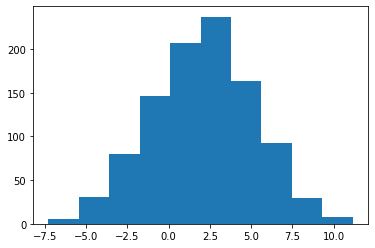

In [52]:
samples = 3 * np.random.randn(1000) + 2
plt.hist(samples);

In [53]:
stats.norm.fit(samples)

(2.104788134135106, 3.0661517416917294)

In [54]:
a = np.random.randn(300)
b = np.random.randn(300) + 0.1

In [55]:
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-1.7336196155239731, pvalue=0.08350101726347361)

You can also perform kernel density estimation

In [56]:
x = np.hstack(( 2*np.random.randn(1000)+5,  0.6*np.random.randn(1000)-1) )

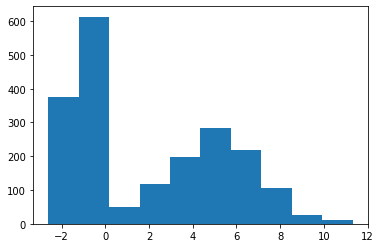

In [57]:
plt.hist(x);

In [58]:
pdf = stats.kde.gaussian_kde(x)

In [59]:
type(pdf)

scipy.stats.kde.gaussian_kde

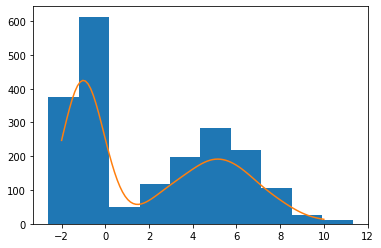

In [60]:
counts, bins, _ = plt.hist(x)
x_fine = np.linspace(-2,10,100)
plt.plot(x_fine, np.sum(counts) * pdf(x_fine))

## Numerical Integration : `scipy.integrate`

In [61]:
import scipy.integrate as integ

You can compute integral using the `quad` funtion

In [62]:
def f(x):
    return x**2 + 5*x + np.sin(x)

In [63]:
integ.quad(f,-1,1)

(0.6666666666666667, 6.547013372677054e-14)

In [64]:
integ.quad?

You can also solve ODEs of the form
$$ \frac{dy}{dt} = f(y,t) $$

In [65]:
def f(y,t):
    return (y[1], -y[1] - 9*y[0])

In [66]:
t = np.linspace(0,10,100)
Y = integ.odeint(f,[1,1],t)

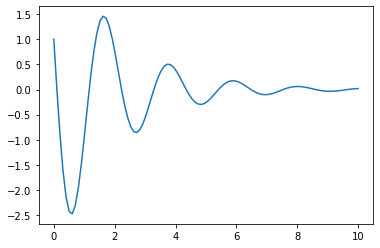

In [67]:
plt.plot(t,Y[:,1])

In [68]:
t = np.linspace(0,10,10)
t2 = np.linspace(0,10,100)
Y = integ.odeint(f,[1,1],t)
Y2 = integ.odeint(f,[1,1],t2)

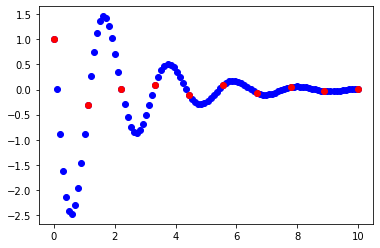

In [69]:
plt.plot(t2,Y2[:,1],'bo')
plt.plot(t,Y[:,1],'ro')

## Physical simulation
Let's simulate a throwing a ball in two dimensions. The ball is described as a function of time by four functions: $x(t), y(t), v_x(t), v_y(t)$, which are governed by the ODE system:

$$
    \frac{dx}{dt} = v_x, \qquad
    \frac{dy}{dt} = v_y, \qquad
    \frac{dv_x}{dt} = 0, \qquad
    \frac{dv_y}{dt} = -g.
$$

We can think of this in vectorized form as:

$$
    \frac{d}{dt} \begin{pmatrix} x \\ y \\ v_x \\ v_y \end{pmatrix} = \begin{pmatrix} v_x \\ v_y \\ 0 \\ -g \end{pmatrix}
$$

In [70]:
def dzdt(z, t):
    x, y, vx, vy = z
    g = 1
    return np.array([vx, vy, 0, -g])

In [71]:
np.linspace(0, 50, 20)

array([ 0.        ,  2.63157895,  5.26315789,  7.89473684, 10.52631579,
       13.15789474, 15.78947368, 18.42105263, 21.05263158, 23.68421053,
       26.31578947, 28.94736842, 31.57894737, 34.21052632, 36.84210526,
       39.47368421, 42.10526316, 44.73684211, 47.36842105, 50.        ])

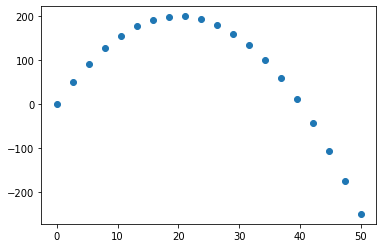

In [72]:
x, y = 0, 0
vx, vy = 1, 20
z = np.array([x, y, vx, vy])
t = np.linspace(0, 50, 20)

result = integ.odeint(dzdt, z, t)

plt.scatter(result[:, 0], result[:, 1])
plt.show()

## 1. Exercise
We can add drag with the following slight modification to the ODE, which adds a force with direction opposing the current velocity, and with magnitude proportional to the velocity squared.
    
$$
    \frac{d}{dt} \begin{pmatrix} x \\ y \\ v_x \\ v_y \end{pmatrix} = \begin{pmatrix} v_x \\ v_y \\ -\alpha v_x \sqrt{v_x^2 + v_y^2} \\ -g -\alpha v_y \sqrt{v_x^2 + v_y^2} \end{pmatrix}
$$

Implement this with $\alpha = 0.001$, plot the resulting trajectory, and compare to the dragless case.

In [73]:
def dzdt_drag(z, t):
    x, y, vx, vy = z
    g = 1
    alpha = 0.001
    return np.array([vx, 
                     vy, 
                     -alpha*vx*np.sqrt(vx**2 + vy**2),
                     -g -alpha*vy*np.sqrt(vx**2 + vy**2)])

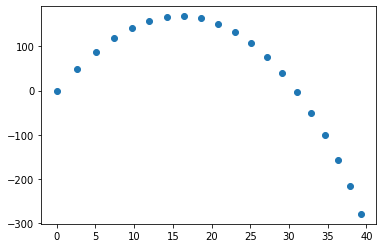

In [74]:
x, y = 0, 0
vx, vy = 1, 20
z = np.array([x, y, vx, vy])
t = np.linspace(0, 50, 20)

result = integ.odeint(dzdt_drag, z, t)

plt.scatter(result[:, 0], result[:, 1])
plt.show()

# Other useful packages

## `networkx`
Useful Package to handle graphs.

Install by running `conda install networkx`

In [75]:
import networkx as nx

In [76]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4])
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,1)
G.add_edge(3,4)

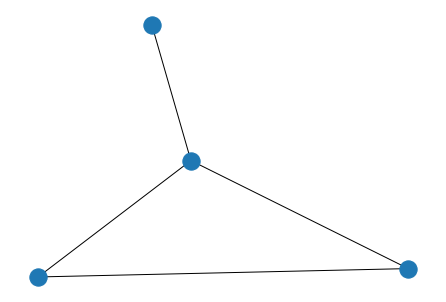

In [77]:
nx.draw(G)

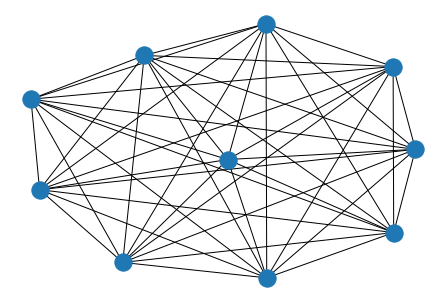

In [78]:
G = nx.complete_graph(10)
nx.draw(G)

## `sympy`

Package for performing symbolic computation and manipulation.

Install it in your environment by running `conda install sympy`

In [79]:
from sympy import *

In [80]:
x,y = symbols("x y")

In [81]:
x

x

In [82]:
expr = x + y**2

In [83]:
expr

x + y**2

In [84]:
# in colab run this to get latex output
# init_printing(use_latex='matplotlib')

In [85]:
x*expr

x*(x + y**2)

In [86]:
expand(x*expr)

x**2 + x*y**2

In [87]:
factor(x**2 -2*x*y + y**2)

(x - y)**2

In [88]:
latex(expr)

'x + y^{2}'

In [89]:
simplify((x-y)**2 + (x+y)**2)

2*x**2 + 2*y**2

In [90]:
x**2/(y**3 + y)

x**2/(y**3 + y)

In [91]:
(x**2/(y**3 + y)).subs(y, 1/(1+x)).simplify()

x**2*(x + 1)**4/(x + (x + 1)**3 + 1)

In [92]:
(x**2/(y**3 + y)).evalf(subs={'x':2, 'y':4})

0.0588235294117647

In [93]:
Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

In [94]:
I = Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

In [95]:
I.doit()

pi

In [96]:
(sin(x)/(1+cos(x)))

sin(x)/(cos(x) + 1)

In [97]:
(sin(x)/(1+cos(x))).series(x,0,10)

x/2 + x**3/24 + x**5/240 + 17*x**7/40320 + 31*x**9/725760 + O(x**10)

## Extra Exercises
The following exercises requires the combined usage of the packages we learnt today. 

1. Generate 10 random polynomials of order 5
    - Numerically and analytically integrate them from 0 to 1 and compare the answers.
    - Compute a minima for each polynomial and if it exists show that the analytically computed derivative is 0 at the minima
    - Randomly sample the polynomials in the range from 0 to 1, and see if you can recover the original coefficents by trying to fit a 5th order polynomial to the samples.
2. Read and learn about [Erdos-Renyi Random Graphs](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model). See if you can numerically verify some of the properties mentioned in the wiki, such as for what parameter values is the graph most likely connected.

#### 1.

In [129]:
coef = np.random.randint(-5, 5, size=(10,6))
coef

array([[-2, -1,  2,  2,  1, -4],
       [ 0,  2, -4, -5,  4,  1],
       [ 3,  3,  3, -3,  4,  4],
       [-1,  3,  2,  2, -2,  3],
       [-5, -1, -1, -3,  2,  3],
       [ 2,  1,  3,  2,  2,  3],
       [-1, -5, -4, -2,  3,  1],
       [-2, -4,  1, -3, -3,  4],
       [ 4, -4,  0,  4,  0,  2],
       [ 4, -4,  4, -5, -3,  1]])

In [130]:
def h(w):
    v = coef[1,:]
    return v[0]*w**5 + v[1]*w**4 + v[2]*w**3 + v[3]*w**2 + v[4]*w + v[5] 

In [131]:
integ.quad(h,0,1)

(0.7333333333333333, 1.2987971794528793e-14)

In [132]:
x = symbols("x")
x

x

In [133]:
poly = (x**5 + x**4 + x**3 + x**2 + x + 1)
poly

x**5 + x**4 + x**3 + x**2 + x + 1

In [134]:
x_vector = np.array([x**5, x**4, x**3, x**2, x, 1])
x_vector

array([x**5, x**4, x**3, x**2, x, 1], dtype=object)

In [135]:
poly_arr = coef[0,:] * x_vector
poly_arr

array([-2*x**5, -x**4, 2*x**3, 2*x**2, x, -4], dtype=object)

In [159]:
expr = np.dot(coef[1,:], x_vector)
expr

2*x**4 - 4*x**3 - 5*x**2 + 4*x + 1

In [160]:
I = Integral(expr, (x, 0, 1))
I

Integral(2*x**4 - 4*x**3 - 5*x**2 + 4*x + 1, (x, 0, 1))

In [161]:
I.doit()

11/15

In [162]:
results = optimize.minimize(h, 13)
results

      fun: -10.999999999999998
 hess_inv: array([[0.02629653]])
      jac: array([4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 45
      nit: 14
     njev: 15
   status: 0
  success: True
        x: array([2.])

In [145]:
x_min = results.x
x_min

array([2.])

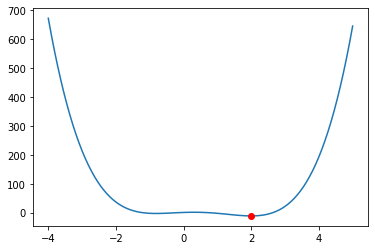

In [165]:
t = np.linspace(-4,5,100)
plt.plot(t,h(t));
plt.plot(x_min, h(x_min), 'ro')

In [166]:
# Compute the first derivative
d_expr = diff(expr, x)
d_expr

8*x**3 - 12*x**2 - 10*x + 4

In [167]:
# Find the roots of first derivative
solve(d_expr, x=x_min)

[2, -1/4 + sqrt(5)/4, -sqrt(5)/4 - 1/4]

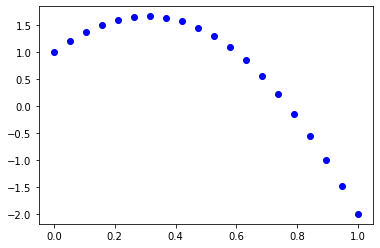

In [171]:
# Sampling the interval [0, 1]
s = np.linspace(0,1,20)
q = h(s)
plt.plot(s, q,'bo');

In [172]:
# Polynomial of 5th order for curve fitting
def poly_5(x,a5,a4,a3,a2,a1,a0):
    return a5*x**5 + a4*x**4 + a3*x**3 + a2*x**2 + a1*x + a0

In [173]:
# Compute the coeficients of a polynomial of order 5 to fit the curve above
# Compare the coeficients with the original expr
((a5,a4,a3,a2,a1,a0),_) = optimize.curve_fit(poly_5,s,q,(0,0,0,0,0,0))
a5,a4,a3,a2,a1,a0

(2.151165613261628e-06,
 1.9999946192519789,
 -3.999995266946613,
 -5.0000017159578425,
 4.000000222169765,
 0.9999999951984824)

In [174]:
coef[1,:]

array([ 0,  2, -4, -5,  4,  1])

#### 2.

node degree clustering
0 5 0.400000
1 4 0.500000
2 4 0.166667
3 6 0.333333
4 4 0.166667
5 3 0.000000
6 3 0.000000
7 3 0.333333
8 4 0.333333
9 4 0.166667
0 9 1 7 8 3
1 2 4 3
2 9 5 3
3 7 8 4
4 6 9
5 6 7
6 8
7
8 9
9


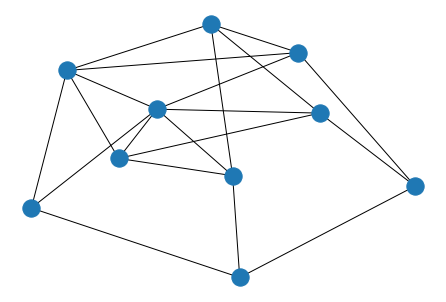

In [184]:
n = 10  # 10 nodes
m = 20  # 20 edges

G = nx.gnm_random_graph(n, m)

# some properties
print("node degree clustering")
for v in nx.nodes(G):
    print('%s %d %f' % (v, nx.degree(G, v), nx.clustering(G, v)))

# print the adjacency list
for line in nx.generate_adjlist(G):
    print(line)

nx.draw(G)
# plt.show()